## tensorflow name_scope & variable_scope

In [5]:
import tensorflow as tf
with tf.name_scope("hello") as name_scope:
    a1 = tf.get_variable("a3",shape=[1,1],dtype=tf.float32)
    print(name_scope)
    print(a1.name)
    print(a1.op.name)

hello_4/
a3:0
a3


In [6]:
with tf.variable_scope("hello") as variable_scope:
    a1 = tf.get_variable("a1",shape=[1,1],dtype = tf.float32)
    print(variable_scope)
    print(a1.name)

hello/a1:0


从上面两个例子可以看出，

1.tf.variable_scope返回的是一个op对象

2.variable_scope中定义的variable 的name加上了”hello/”前缀

In [9]:
with tf.name_scope("name1"):
    with tf.variable_scope("var1"):
        w = tf.get_variable("w1",shape=[2])
        res = tf.add(w,[3])
print(w.name)
print(res.name)

var1/w1:0
name1_2/var1/Add:0


可以看出：variable scope和name scope都会给op的name加上前缀

从上面三个例子可以看出：

1.name_scope对 get_variable()创建的变量 的名字不会有任何影响,而创建的op会被加上前缀.

2.tf.get_variable_scope() 返回的只是 variable_scope,不管 name_scope.所以以后我们在使用tf.get_variable_scope().reuse_variables() 时可以无视name_scope

3.name_scope 是给op_name加前缀, variable_scope是给get_variable()创建的变量的名字加前缀


1. 使用tf.Variable()的时候，tf.name_scope()和tf.variable_scope() 都会给 Variable 和 op 的 name属性加上前缀。 
2. 使用tf.get_variable()的时候，tf.name_scope()就不会给 tf.get_variable()创建出来的Variable加前缀。

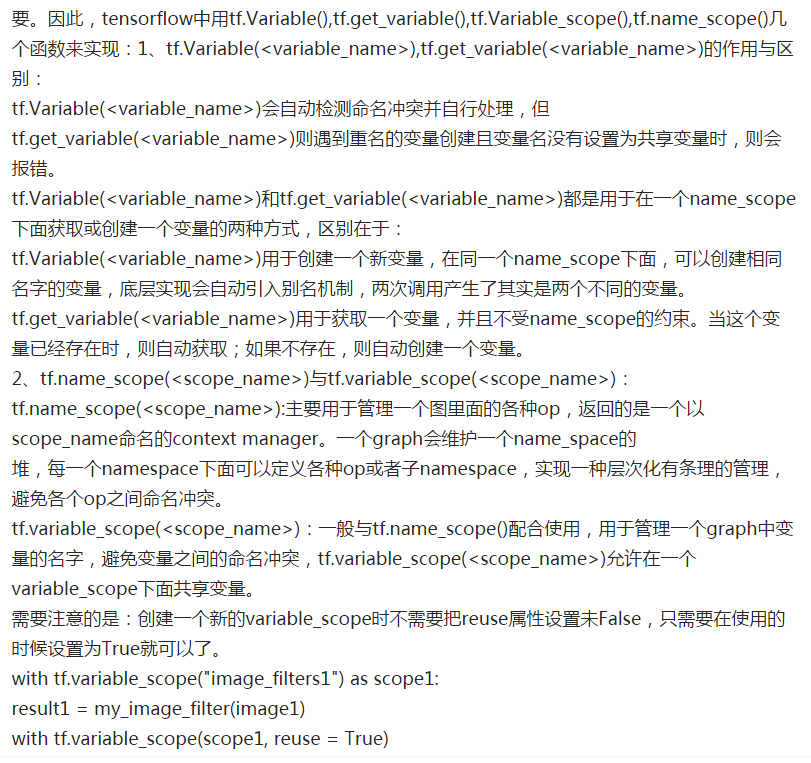

In [10]:


with tf.variable_scope('variable_scope_y') as scope:
    var1 = tf.get_variable(name='var1', shape=[1], dtype=tf.float32)
    scope.reuse_variables()  # 设置共享变量
    var1_reuse = tf.get_variable(name='var1')
    var2 = tf.Variable(initial_value=[2.], name='var2', dtype=tf.float32)
    var2_reuse = tf.Variable(initial_value=[2.], name='var2', dtype=tf.float32)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    print(var1.name, sess.run(var1))
    print(var1_reuse.name, sess.run(var1_reuse))#可以看出重用了
    print(var2.name, sess.run(var2))
    print(var2_reuse.name, sess.run(var2_reuse))#tf.Variable定义则不受重用影响，会自动重新分配一个名字

variable_scope_y/var1:0 [-0.63824046]
variable_scope_y/var1:0 [-0.63824046]
variable_scope_y/var2:0 [ 2.]
variable_scope_y/var2_1:0 [ 2.]
